In [1]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [7]:
#Loading dataset
redWine = pd.read_csv('/Users/sepehr/Desktop/ECE_225A/final_project/ece225_final_project/Dataset/winequality-red.csv',sep = ';')
whiteWine = pd.read_csv('/Users/sepehr/Desktop/ECE_225A/final_project/ece225_final_project/Dataset/winequality-white.csv',sep = ';')

In [9]:
redWine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
whiteWine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [22]:
redWine['alcohol']

0        9.4
1        9.8
2        9.8
3        9.8
4        9.4
        ... 
1594    10.5
1595    11.2
1596    11.0
1597    10.2
1598    11.0
Name: alcohol, Length: 1599, dtype: float64

In [23]:
print("Red Wine Quality dataset has {} samples with {} features each.".format(*wine.shape))
display(redWine.head())

Red Wine Quality dataset has 1599 samples with 12 features each.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
#Let's check how the data is distributed
redWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
#Information about the data columns
redWine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"    1599 non-null object
dtypes: object(1)
memory usage: 12.6+ KB


In [12]:
print("White Wine Quality dataset has {} samples with {} features each.".format(*whiteWine.shape))
display(whiteWine.head())

White Wine Quality dataset has 4898 samples with 12 features each.


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Data Cleaning

In [14]:
missingValuesRed = redWine.isnull().sum()
missingValuesWhite = whiteWine.isnull().sum()
display("Total number of missing values in our red wine dataset are:", missingValuesRed)
display("Total number of missing values in our white wine dataset are:", missingValuesWhite)

'Total number of missing values in our red wine dataset are:'

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

'Total number of missing values in our white wine dataset are:'

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [18]:

# from sklearn import preprocessing

# featuresRed = redWine.keys()
# featuresWhite = whiteWine.keys()

# min_max_scaler = preprocessing.MinMaxScaler()
# data_array_scaled_red = min_max_scaler.fit_transform(redWine)
# data_array_scaled_white = min_max_scaler.fit_transform(whiteWine)

# data_scaled_red = pd.DataFrame()
# data_scaled_white = pd.DataFrame()
# for x in range(0,12):
#     dataset_red = pd.DataFrame({featuresRed[x]:data_array_scaled_red[:,x]})
#     data_scaled_red = pd.concat([data_scaled_red, dataset_red], axis=1, join_axes=[dataset_red.index])
# for x in range(0,12):
#     dataset_white = pd.DataFrame({featuresWhite[x]:data_array_scaled_white[:,x]})
#     data_scaled_white = pd.concat([data_scaled_white, dataset_white], axis=1, join_axes=[dataset_white.index])
    
# display(data_scaled_red.head())
# display(data_scaled_white.head())
# From sklear we are importing 'preprocessing'
# Further MinMaxScaler() will be used for scaling data between [0,1]

from sklearn import preprocessing

# Setting all the column names in a variable 'features'
features = redWine.keys()

min_max_scaler = preprocessing.MinMaxScaler()
data_array_scaled = min_max_scaler.fit_transform(redWine)

# Creating an empty data frame
data_scaled = pd.DataFrame()

for x in range(0,12):
    dataset = pd.DataFrame({features[x]:data_array_scaled[:,x]})
    data_scaled = pd.concat([data_scaled, dataset], axis=1, join_axes=[dataset.index])
    
display(data_scaled.head())

TypeError: concat() got an unexpected keyword argument 'join_axes'

## Let's do some plotting to know how the data columns are distributed in the dataset

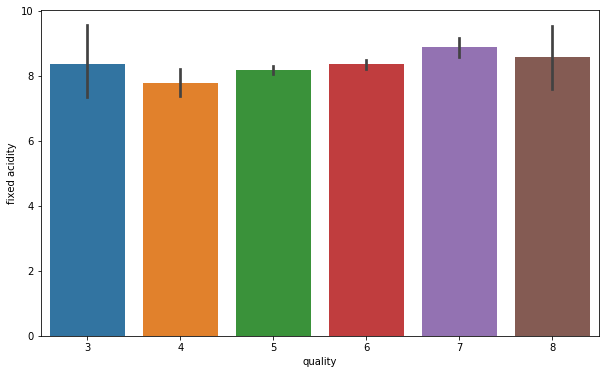

In [25]:
#Here we see that fixed acidity does not give any specification to classify the quality.
fig = plt.figure(figsize = (10,6))
sns.barplot(x = "quality", y = "fixed acidity", data = wine)